In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
# set random seed
SEED = 321
np.random.seed(SEED)

# (Core) Preparing Time Series from Wide-Form Data

## Part 1

### Load in the Zillow Home Value Index dataframe.

In [2]:
# import data
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv")
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,236350,28439,Palisades,city,TX,TX,"Amarillo, TX",Randall County,NaN,NaN,...,198490.0,198467.0,196420.0,192002.0,191634.0,189383.0,191134.0,191343.0,192384.0,192110.0
22463,40403,28439,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,NaN,NaN,...,229251.0,232984.0,238245.0,240154.0,242470.0,243119.0,249098.0,255572.0,261910.0,264685.0
22464,54740,28439,Tribes Hill,city,NY,NY,"Amsterdam, NY",Montgomery County,53380.0,53662.0,...,132490.0,134951.0,137470.0,137430.0,137413.0,137615.0,138908.0,140096.0,141573.0,142438.0
22465,249186,28439,Derby Center,city,VT,VT,NaN,Orleans County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,258191.0,261607.0,264571.0,266255.0


In [3]:
# check for nulls
df.isna().sum().sum()

1754072

In [4]:
# fill null values
df = df.fillna(method='ffill')

In [5]:
# check again for nulls
df.isna().sum().sum()

1

In [6]:
# fill null values
df = df.fillna(method='bfill')

In [7]:
# check again for nulls
df.isna().sum().sum()

0

### Filter the 4 largest cities into a new dataframe.

Tip: the "SizeRank" column has already ranked the cities by size. The larger the city, the smaller the rank value.
Therefore the 4 largest cities would have rank values of [0,1,2,3]

In [8]:
# create new df with filtered data
df_four = df.head(4)

# preview new df
df_four

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


### Melt the data to long-form and prepare it for time series analysis.

In [9]:
# melt data to long-form
melted = pd.melt(df_four.drop(columns=['RegionID','SizeRank','RegionType','StateName','State','Metro','CountyName']), id_vars=['RegionName'], value_name='Value',var_name="Date")

# preview melted df
melted

,RegionName,Date,Value
0,New York,2000-01-31,253690.0
1,Los Angeles,2000-01-31,234181.0
2,Houston,2000-01-31,109068.0
3,Chicago,2000-01-31,166139.0
4,New York,2000-02-29,255517.0
...,...,...,...
1087,Chicago,2022-08-31,315587.0
1088,New York,2022-09-30,781622.0
1089,Los Angeles,2022-09-30,966595.0
1090,Houston,2022-09-30,272639.0


### Convert the melted dates into datetime datatype.

In [10]:
# convert Date column to datetime
melted['Date'] = pd.to_datetime(melted['Date'])

In [11]:
# verify change
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionName  1092 non-null   object        
 1   Date        1092 non-null   datetime64[ns]
 2   Value       1092 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.7+ KB


### Make the datetime column the index.

In [12]:
# set Date as index
melted = melted.set_index("Date")

# verify change
melted

,RegionName,Value
Date,,
2000-01-31,New York,253690.0
2000-01-31,Los Angeles,234181.0
2000-01-31,Houston,109068.0
2000-01-31,Chicago,166139.0
2000-02-29,New York,255517.0
...,...,...
2022-08-31,Chicago,315587.0
2022-09-30,New York,781622.0
2022-09-30,Los Angeles,966595.0


### Resample the dataframe as monthly frequency, grouped by City.

In [13]:
# use groupby by city and resample by month
df_four_ts = melted.groupby('RegionName').resample("M").sum()

# verify changes
df_four_ts

C:\Users\eliud\AppData\Local\Temp\ipykernel_15984\976740907.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_four_ts = melted.groupby('RegionName').resample("M").sum()
C:\Users\eliud\AppData\Local\Temp\ipykernel_15984\976740907.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_four_ts = melted.groupby('RegionName').resample("M").sum()
C:\Users\eliud\AppData\Local\Temp\ipykernel_15984\976740907.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which 

Value
RegionName Date                
Chicago    2000-01-31  166139.0
           2000-02-29  166536.0
           2000-03-31  167368.0
           2000-04-30  168826.0
           2000-05-31  170499.0
...                         ...
New York   2022-05-31  768797.0
           2022-06-30  773944.0
           2022-07-31  777692.0
           2022-08-31  779960.0
           2022-09-30  781622.0

[1092 rows x 1 columns]

## Part 2

### Plot the home values for all 4 cities. (Hint: use unstack)
Make sure to add a title and axis labels.

In [14]:
unstacked_df = df_four_ts.unstack(level=0)
unstacked_df

Value                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-31  166139.0  109068.0    234181.0  253690.0
2000-02-29  166536.0  109079.0    234401.0  255517.0
2000-03-31  167368.0  108878.0    235513.0  257207.0
2000-04-30  168826.0  108881.0    237589.0  260310.0
2000-05-31  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-31  312487.0  265558.0    990391.0  768797.0
2022-06-30  314663.0  268901.0    992337.0  773944.0
2022-07-31  315910.0  271059.0    992630.0  777692.0
2022-08-31  315587.0  272400.0    978196.0  779960.0
2022-09-30  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

### Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc")
Hint: use the FuncFormatter from matplotlib.

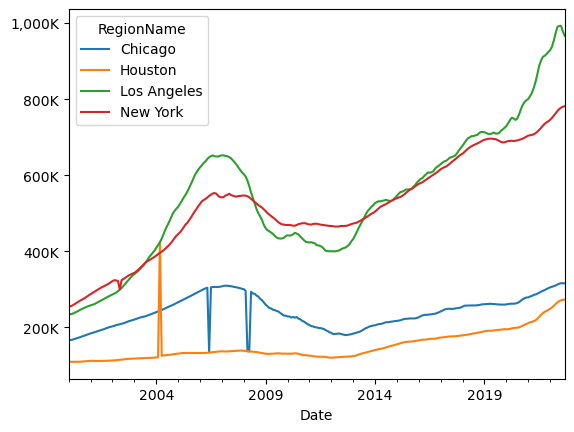

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks

str_fmt = mticks.StrMethodFormatter("{x:,.0f}")

# thousands function for use with FuncFormatter
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"

# create formatter
fmt_thous = mticks.FuncFormatter(thousands)

ax = unstacked_df['Value'].plot()

ax.yaxis.set_major_formatter(fmt_thous)

### Answer the following 2 questions using pandas:

#### 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex.

Most: New York

Least: Houston

In [16]:
df_four_ts = df_four_ts.loc[pd.IndexSlice[:, '2008'],:]
df_four_ts

Value
RegionName  Date                
Chicago     2008-01-31  300207.0
            2008-02-29  296063.0
            2008-03-31  136795.0
            2008-04-30  136628.0
            2008-05-31  293467.0
            2008-06-30  288495.0
            2008-07-31  288174.0
            2008-08-31  283199.0
            2008-09-30  280695.0
            2008-10-31  274849.0
            2008-11-30  271059.0
            2008-12-31  265306.0
Houston     2008-01-31  138208.0
            2008-02-29  137512.0
            2008-03-31  136795.0
            2008-04-30  136628.0
            2008-05-31  136228.0
            2008-06-30  135773.0
            2008-07-31  135392.0
            2008-08-31  134770.0
            2008-09-30  133932.0
            2008-10-31  133189.0
            2008-11-30  132247.0
            2008-12-31  131283.0
Los Angeles 2008-01-31  603029.0
            2008-02-29  596635.0
            2008-03-31  586065.0
            2008-04-30  571226.0
            2008-05-31  554589.0
            2008-06-30  539622.0
            2008-07-31  524220.0
            2008-08-31  510520.0
            2008-09-30  500124.0
            2008-10-31  490979.0
            2008-11-30  481905.0
            2008-12-31  469294.0
New York    2008-01-31  546538.0
            2008-02-29  546098.0
            2008-03-31  544562.0
            2008-04-30  541865.0
            2008-05-31  537685.0
            2008-06-30  533810.0
            2008-07-31  529211.0
            2008-08-31  525290.0
            2008-09-30  521347.0
            2008-10-31  518048.0
            2008-11-30  514767.0
            2008-12-31  510309.0

#### 2) How much did the home values change from November 2008 to December 2008 (in dollars)?
Hint: you can use .diff() to calculate the change in values

Chicago: -5753

Houston: -964

Los Angeles: -12611

New York: -4458

In [17]:
df_four_ts_diff = df_four_ts.loc[pd.IndexSlice[:, '2008-11':'2008-12'],:]
df_four_ts_diff

Value
RegionName  Date                
Chicago     2008-11-30  271059.0
            2008-12-31  265306.0
Houston     2008-11-30  132247.0
            2008-12-31  131283.0
Los Angeles 2008-11-30  481905.0
            2008-12-31  469294.0
New York    2008-11-30  514767.0
            2008-12-31  510309.0

In [18]:
diff_nov_dec = df_four_ts_diff.diff()

diff_nov_dec

Value
RegionName  Date                
Chicago     2008-11-30       NaN
            2008-12-31   -5753.0
Houston     2008-11-30 -133059.0
            2008-12-31    -964.0
Los Angeles 2008-11-30  350622.0
            2008-12-31  -12611.0
New York    2008-11-30   45473.0
            2008-12-31   -4458.0

In [35]:
df_gs = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv')

In [36]:
df_gs.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


## Time Series Models for Home Values

### Filter the dataset only to include values starting in 2018

In [38]:
# melt and drop unnecessary columns
df_gs_melted = pd.melt(df_gs.drop(columns=['RegionID','SizeRank','RegionType','StateName','State','Metro','CountyName']), id_vars=['RegionName'], value_name='Value',var_name="Date")

In [61]:
# preview data
df_gs_melted.head()

,RegionName,Date,Value
0,New York,2000-01-31,253690.0
1,Los Angeles,2000-01-31,234181.0
2,Houston,2000-01-31,109068.0
3,Chicago,2000-01-31,166139.0
4,San Antonio,2000-01-31,114794.0


In [49]:
# drop all cities besides New York
df_gs_ny = df_gs_melted.loc[df_gs_melted['RegionName'] == 'New York']

In [60]:
# preview data
df_gs_ny.head()

,City,Value
Date,,
2000-01-31,New York,253690.0
2000-02-29,New York,255517.0
2000-03-31,New York,257207.0
2000-04-30,New York,260310.0
2000-05-31,New York,263204.0


In [57]:
# change RegionName column name to City
df_gs_ny.rename(columns = {'RegionName':'City'}, inplace = True)

C:\Users\eliud\AppData\Local\Temp\ipykernel_15984\4232325267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gs_ny.rename(columns = {'RegionName':'City'}, inplace = True)


In [59]:
# set Date as datetime and index

# convert Date column to datetime
df_gs_ny['Date'] = pd.to_datetime(df_gs_ny['Date'])
# set Date as index
df_gs_ny = df_gs_ny.set_index("Date")

C:\Users\eliud\AppData\Local\Temp\ipykernel_15984\189330156.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gs_ny['Date'] = pd.to_datetime(df_gs_ny['Date'])


In [63]:
# preview data
df_gs_ny.head()

,City,Value
Date,,
2000-01-31,New York,253690.0
2000-02-29,New York,255517.0
2000-03-31,New York,257207.0
2000-04-30,New York,260310.0
2000-05-31,New York,263204.0


In [64]:
# filter for 2018 and beyond
df_gs_ny = df_gs_ny.loc['2018':]
df_gs_ny.head()

,City,Value
Date,,
2018-01-31,New York,656700.0
2018-02-28,New York,661012.0
2018-03-31,New York,665672.0
2018-04-30,New York,669989.0
2018-05-31,New York,673514.0


### Check for and address null values.


In [65]:
df_gs_ny.isna().sum()

City     0
Value    0
dtype: int64

### Decompose the Time series to detect seasonality and decide if your model should or should not have a seasonal component


### Determine Time Series Model Orders
#### Check the time series for stationarity.
##### Determine the number of differencing needed to make the data stationary
#### Check the ACF/PACF Plots of the differenced data to determine the orders


### Split the time series into training and test data (Remember we want to predict 6 months, and our data has been resampled to monthly)


### Fit a manual ARIMA/SARIMA model based on the orders determined during your exploration.
#### Make forecasts with your model.
#### Plot the forecasts versus the test data
#### Obtain metrics for evaluation

### Tune with pmdarima's auto_arima
#### Fit a model on training data with the best parameters from auto_arima
#### Obtain metrics for evaluation
#### Make forecasts with the auto_arima model
#### Plot the forecasts versus the test data

### Select your final model


### Make true future forecasts using the entire dataset (for dates beyond the entire ts).
#### Calculate the predicted net change in home value for the forecasted period as both:
##### Raw values for change in the final month in the forecast vs. the first month.
##### Convert the raw delta into a percent change.

Answer the following questions in a Markdown cell

1 - What is the predicted home value in New York City 6 months into the future (beyond the dataset)?

2 - What is the percent change in home values in New York City by the end of the 6-month forecast (beyond the dataset)?